In [3]:
import PIL
from PIL import Image
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import os
import sys
import random
from matplotlib import pyplot as plt

### 1. Gender Distribution

In [4]:
def generateGenderDistribution():
    # Generate Gender Distribution from data source
    gender_df = DataFrame({'Gender' : [1, 0], 'Probability' : [0.4852, 0.5148]})
    return gender_df
gender_df = generateGenderDistribution()

### 2. Population Distribution

In [5]:
def generatePopulationDistribution(seed = 99):
    # Generate population distribution from data source and random number for population list
    # >>> generatePopulationDistribution(seed = 99)
    # >>> Population Density Range	Probability
    #            0	(7128, 7325)	0.120283
    #            1	(2970, 3167)	0.077270
    #            2	(12270, 12466)	0.037713
    #            3	(23499, 23695)	0.036740
    #            4	(5940, 6137)	0.036407
    #            ...	...	...
    #            147	(11482, 11678)	0.001331
    #            148	(8910, 9107)	0.001331
    #            149	(10098, 10295)	0.001319
    #            150	(19165, 19361)	0.001293
    #            151	(20347, 20543)	0.001293
    random.seed(99)
    population_img = Image.open(r'./Distribution/City of Chicago population density circa 2010.jpg')
    population_image_sequence = population_img.getdata()
    population_image_array = np.array(population_image_sequence)
    population_image_series = Series(population_image_array.tolist()).map(lambda x : ', '.join(list(map(str, x))))
    population_image_series_vc = population_image_series.value_counts()
    population_image_series_vc = population_image_series_vc.iloc[1:]
    population_image_series_vc = population_image_series_vc[population_image_series_vc > 100]
    population_p  = population_image_series_vc / population_image_series_vc.sum()
    population_p = population_p.values.tolist()

    x = 30000
    num_bins = len(population_p)
    lower_ls = list(map(min, np.array_split(range(x), num_bins)))
    upper_ls = list(map(max, np.array_split(range(x), num_bins)))
    range_ls = list(zip(lower_ls, upper_ls))
    random.shuffle(range_ls)
    population_df = DataFrame({'Population Density Range' : range_ls, 'Probability' : population_p})
    return population_df
population_df = generatePopulationDistribution(seed = 99)

### 3. Income Distribution

In [6]:
def generateIncomeDistribution(seed = 20):
    # Generate population distribution from data source and random number for population list
    # >>> generateIncomeDistribution(seed = 20)
    #         Income Range	Probability
    #         0	(10003, 11431)	0.073294
    #         1	(51444, 52872)	0.023482
    #         2	(174336, 175763)	0.019728
    #         3	(47157, 48585)	0.019662
    #         4	(112891, 114319)	0.019105
    #         ...	...	...
    #         205	(54302, 55730)	0.000245
    #         206	(280008, 281435)	0.000239
    #         207	(287148, 288575)	0.000237
    #         208	(250020, 251447)	0.000235
    #         209	(264300, 265727)	0.000210    
    random.seed(20)
    income_img = Image.open(r'./Distribution/Chicago-Median-Household-Income.png')
    income_image_sequence = income_img.getdata()
    income_image_array = np.array(income_image_sequence)
    income_image_series = Series(income_image_array.tolist()).map(lambda x : ', '.join(list(map(str, x))))
    income_image_series_vc = income_image_series.value_counts()
    income_image_series_vc = income_image_series_vc.iloc[1:]
    income_image_series_vc = income_image_series_vc[income_image_series_vc > 100]
    income_image_series_vc = income_image_series.value_counts()
    income_image_series_vc = income_image_series_vc.iloc[1:]
    income_image_series_vc = income_image_series_vc[income_image_series_vc > 100]
    income_p  = income_image_series_vc / income_image_series_vc.sum()
    income_p = income_p.values.tolist()
    income_image_series_vc = income_image_series.value_counts()
    income_image_series_vc = income_image_series_vc.iloc[1:]
    income_image_series_vc = income_image_series_vc[income_image_series_vc > 100]
    income_p  = income_image_series_vc / income_image_series_vc.sum()
    income_p = income_p.values.tolist()

    x = 300000
    num_bins = len(income_p)
    lower_ls = list(map(min, np.array_split(range(x), num_bins)))
    upper_ls = list(map(max, np.array_split(range(x), num_bins)))
    range_ls = list(zip(lower_ls, upper_ls))
    random.shuffle(range_ls)
    income_df = DataFrame({'Income Range' : range_ls, 'Probability' : income_p})
    return income_df
income_df = generateIncomeDistribution(seed = 20)

### 4. Age Distribution

In [7]:
def generateAgeDistribution():
    # Generate age distribution from data source
    age = [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 100)]
    pct = [3.8, 3.5, 3.3, 3.5, 3.6, 4.8, 4.0, 3.5, 3.3, 3.4, 3.3, 2.8, 2.3, 1.6, 1.2, 0.9, 0.7, 0.5]
    pct = list(map(lambda x : x * 0.02, pct))
    age_df = DataFrame({'Age Range' : age, 'Probability' : pct})
    return age_df
age_df = generateAgeDistribution()

### 5. Preference Distribution

In [8]:
def generatePreferenceDistribution():
    # Generate Preference distribution from data source
    preference_df = DataFrame({'Preference' : ['Dating', 'Shopping', 'News', 'Social'], 'Probability' : [0.4, 0.3, 0.2, 0.1]})
    return preference_df
preference_df = generatePreferenceDistribution()

<hr>

### H1: The daily click-through rate of Tinder app is less than 10%.

In [9]:
def generateMCSimulation(n_customer, gender_df = gender_df, age_df = age_df, income_df = income_df, population_df = population_df, preference_df = preference_df):
    # Generate Monte Carlo Simulation for n_customer based on gender, age, income, population density and preference
    customer_number = n_customer
    gender_arr = np.random.choice(gender_df['Gender'], p = gender_df['Probability'].values.tolist(), size = customer_number)
    age_ls = np.random.choice(age_df['Age Range'], p = age_df['Probability'].values.tolist(), size = customer_number).tolist()
    age_arr = np.array(list(map(lambda x : np.random.uniform(low = x[0], high = [1]).tolist()[0], age_ls)))
    income_ls = np.random.choice(income_df['Income Range'], p = income_df['Probability'].values.tolist(), size = customer_number).tolist()
    income_arr = np.array(list(map(lambda x : np.random.uniform(low = x[0], high = [1]).tolist()[0], income_ls)))
    population_ls = np.random.choice(population_df['Population Density Range'], p = population_df['Probability'].values.tolist(), size = customer_number).tolist()
    population_arr = np.array(list(map(lambda x : np.random.uniform(low = x[0], high = [1]).tolist()[0], population_ls)))
    preference_arr = np.random.normal(loc = 1, scale = 0.5, size = customer_number)
    return population_arr, income_arr, gender_arr, preference_arr, age_arr

Model

z = (0.05(Population)<sup>1/3</sup> - 2.4log(Income) + 0.03(Gender) + 0.013(e<sup>Preference</sup>)) / 0.08e<sup>Age<sup>1/2</sup></sup> 
<br>
y = 1 / (1 + e<sup>-z</sup>)

In [18]:
population_arr, income_arr, gender_arr, preference_arr, age_arr = generateMCSimulation(1000000)
t = (0.05 * np.cbrt(population_arr) - 2.4 * np.log(income_arr) + 0.03 * gender_arr + 0.013 * np.exp(preference_arr)) / (0.08 * np.exp(np.sqrt(age_arr)))
prob = np.round(1 / (1 + np.exp(-t)), 3)
choice = list(map(lambda x : np.random.choice([1, 0], p = [x, 1 - x]), prob.tolist()))
sum(choice) / len(choice)

0.087365

<hr>

### H2: The weather (20 days window size) affects consumers' choices

Model:

z = (0.05(Population)<sup>1/3</sup> - 2.4log(Income) + 0.03(Gender) + 0.013(e<sup>Preference</sup>) + 0.001(Temperature<sup>2</sup>) / 0.08e<sup>Age<sup>1/2</sup></sup>
<br>
y = 1 / (1 + e<sup>-z</sup>)

In [ ]:
temperature = [37, 50, 72, 75, 77, 82, 81, 59, 63, 55, 55, 63, 50, 54, 50, 54, 52, 55, 63, 46]
customer_number = 1000000
ctr_ls = []
for temp in temperature:
    population_arr, income_arr, gender_arr, preference_arr, age_arr = generateMCSimulation(customer_number)
    temp = np.array([temp] * customer_number)
    t = (0.05 * np.cbrt(population_arr) - 2.4 * np.log(income_arr) + 0.03 * gender_arr + 0.013 * np.exp(preference_arr)) + 0.001 * temp * temp / (0.08 * np.exp(np.sqrt(age_arr)))
    prob = np.round(1 / (1 + np.exp(-t)), 3)
    choice = list(map(lambda x : np.random.choice([1, 0], p = [x, 1 - x]), prob.tolist()))
    ctr = sum(choice) / len(choice)
    ctr_ls.append(ctr)
Series(ctr_ls, index = ['04/' + str(x) for x in range(1, 21)])
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
Series(ctr_ls, index = ['04/' + str(x) for x in range(1, 21)]).plot(ax = ax[0], color = 'dodgerblue')
Series(temperature, index = ['04/' + str(x) for x in range(1, 21)]).plot(ax = ax[1], color = 'crimson')

### H3: The screen position of apps will affect their popularities

Model:

z<sub>i, j</sub> = (0.05(Population)<sup>1/3</sup> - 2.4log(Income) + 0.03(Gender) + 0.013(e<sup>Preference</sup>) * e<sup>diff(multivariate_normal(mean(i, j), cov = ([2, 1], [1, 2])))</sup> / 0.08e<sup>Age<sup>1/2</sup></sup>
<br>
probability<sub>i, j</sub>  = z<sub>i, j</sub> / sum(z<sub>i, j</sub>)

Grindr       317079
Target       155311
Hinge        155084
Walmart       70002
Gmail         69776
Bumble        69602
Facebook      29652
Tinder        29384
TikTok        29383
Paypal        29071
Amazon        11709
PHub          11709
Youtube       11608
News           4496
Twitter        4488
Instagram      1646
dtype: int64

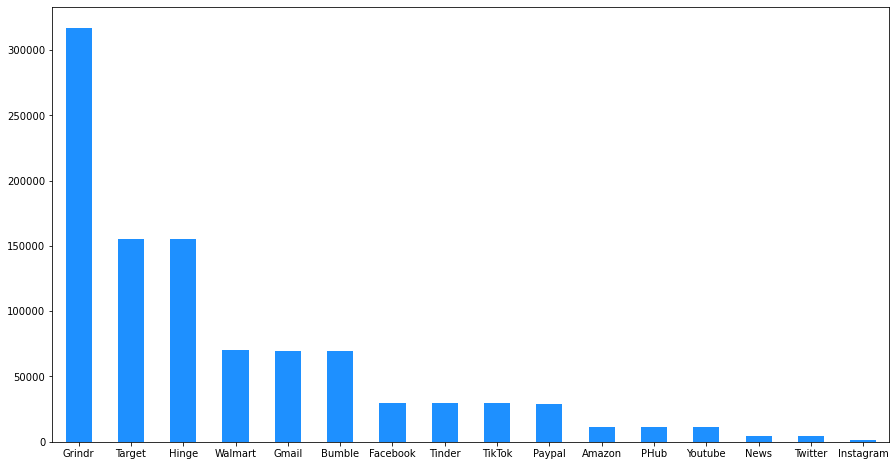

In [47]:
def generateMultivariateNormal(mean_i, mean_j, cov = [[2, 1], [1, 2]], n_customer = 1000000):
    # generate score of screen position exp(diff(multivariate_normal(mean(i, j), cov = ([2, 1], [1, 2])))) based on multivariate normal distribution
    # >>> generateMultivariateNormal(mean_i = 2, mean_j = 2, cov = [[2, 1], [1, 2]], n_customer = 10)
    # array([[0.171],
    #        [1.346],
    #        [1.066],
    #        [0.607],
    #        [3.565],
    #        [1.544],
    #        [0.656],
    #        [0.145],
    #        [1.527],
    #        [0.81 ]])
    res = np.diff(np.random.multivariate_normal(mean = ([mean_i, mean_j]), cov = cov, size = n_customer), axis = 1)
    res = np.round(np.exp(res), 3)
    return res

n_customer = 1000000
population_arr, income_arr, gender_arr, preference_arr, age_arr = generateMCSimulation(n_customer)
position_df = DataFrame()
for i in range(4):
    for j in range(4):
        position_arr = np.array(list(map(lambda x : x[0], generateMultivariateNormal(mean_i = i, mean_j = j, cov = [[2, 1], [1, 2]], n_customer = n_customer))))
        z = (0.05 * np.cbrt(population_arr) - 2.4 * np.log(income_arr) + 0.03 * gender_arr + 0.013 * np.exp(preference_arr)) * position_arr / (0.08 * np.exp(np.sqrt(age_arr)))
        position_df[str(i) + ', ' + str(j)] = z
position_df = position_df.applymap(np.abs)
position_df['Sum'] = position_df.sum(axis = 1)
for i in range(len(position_df.columns)):
    name = position_df.iloc[:, i].name
    position_df[name] = position_df[name] / position_df['Sum']
position_df = position_df.drop(columns = ['Sum'])
choice_ls = []
for i in range(len(position_df)):
    choice = np.random.choice(position_df.columns.tolist(), p = position_df.iloc[i].values.tolist(), size = 1)
    choice_ls.append(choice)
choice_ls = list(map(lambda x : x.tolist()[0], choice_ls))
app_loc_map = {'0, 0' : 'Tinder', '0, 1' : 'Bumble', '0, 2' : 'Hinge', '0, 3' : 'Grindr', 
               '1, 0' : 'Amazon', '1, 1' : 'Paypal', '1, 2' : 'Walmart', '1, 3' : 'Target', 
               '2, 0' : 'Twitter', '2, 1' : 'PHub', '2, 2' : 'Facebook', '2, 3' : 'Gmail', 
               '3, 0' : 'Instagram', '3, 1' : 'News', '3, 2' : 'Youtube', '3, 3' : 'TikTok'}
choice_vc = Series(choice_ls).value_counts()
choice_vc.index = list(map(lambda x : app_loc_map[x], choice_vc.index.tolist()))
choice_vc.plot(kind = 'bar', figsize = (15, 8), color = 'dodgerblue', rot = 0)
choice_vc